# Imports

In [95]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from math import radians, cos, sin, asin, sqrt

In [96]:
dataset = fetch_california_housing()
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
data['MedHouseVal'] = dataset.target
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Description of the dataset


Number of Instances: 20640    

Number of Attributes: 8 numeric, predictive attributes and the target    

Attribute Information:  
MedInc: Median income in block group  
HouseAge: Median house age in block group  
AveRooms: Average number of rooms per household  
AveBedrms: Average number of bedrooms per household  
Population: Block group population  
AveOccup: Average number of household members  
Latitude: Block group latitude  
Longitude: Block group longitude    
MedHouseVal(target): Median house value in units of $100,000  
  
Missing Attribute Values: None

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [98]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


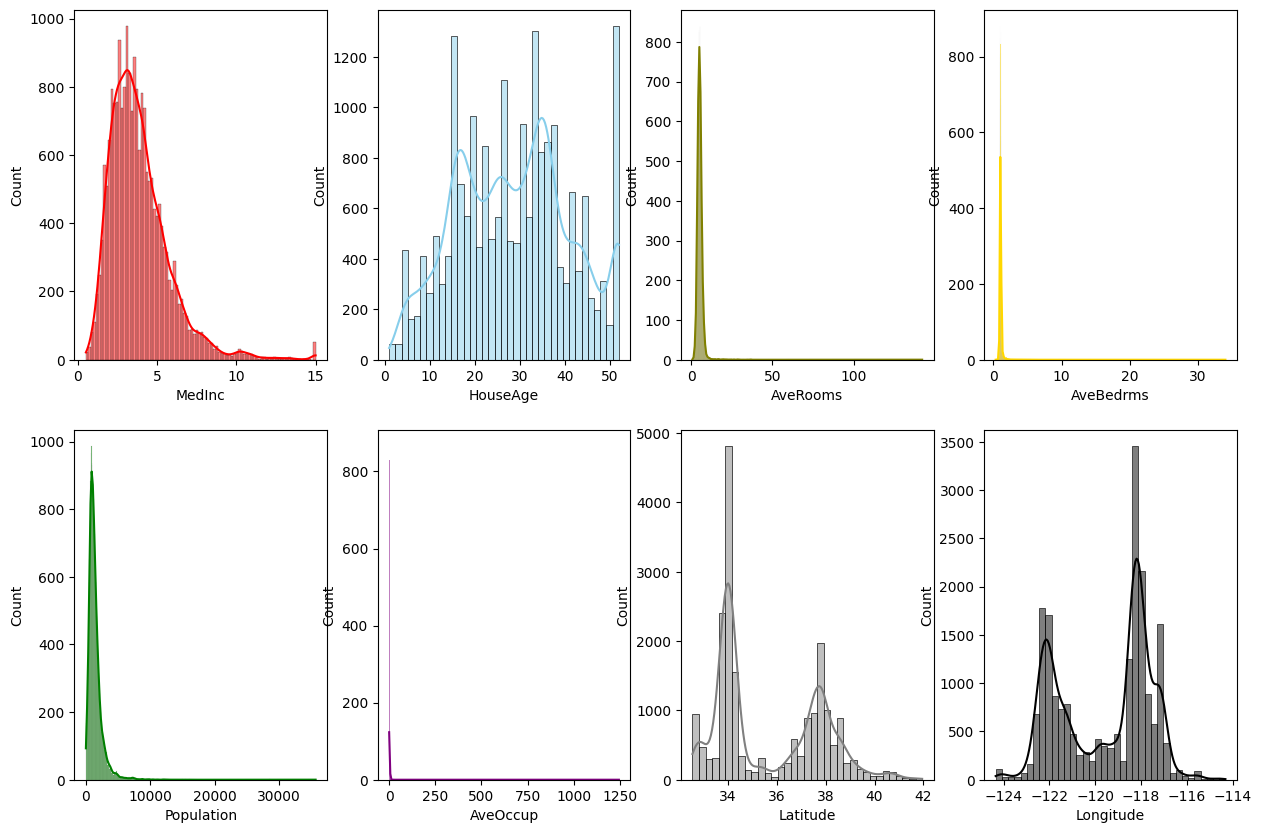

In [99]:
fig, axs = plt.subplots(2,4, figsize=(15, 10))
      
sns.histplot(data= data, x="MedInc", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= data, x="HouseAge", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= data, x="AveRooms", kde=True, color="olive", ax=axs[0,2])
sns.histplot(data= data, x="AveBedrms", kde=True, color="gold", ax=axs[0,3])
sns.histplot(data= data, x="Population", kde=True, color="green", ax=axs[1,0])
sns.histplot(data= data, x="AveOccup", kde=True, color="purple", ax=axs[1,1])
sns.histplot(data= data, x="Latitude", kde=True, color="grey", ax=axs[1,2])
sns.histplot(data= data, x="Longitude", kde=True, color="black", ax=axs[1,3])



plt.show()

In [100]:
# Standardizing the dataset(Target data is NOT scaled, so it is taken seperately)
y = data['MedHouseVal']
data_no_target = data.drop('MedHouseVal', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_no_target)  # Features
data_scaled = scaler.fit_transform(data_no_target)
data_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]], shape=(20640, 8))

In [101]:
data_sc = pd.DataFrame(data=data_scaled, columns=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'])
data_sc

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [102]:

# data_sc = data_sc.drop('MedHouseVal', axis=1)
data_sc

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [103]:
data_sc.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


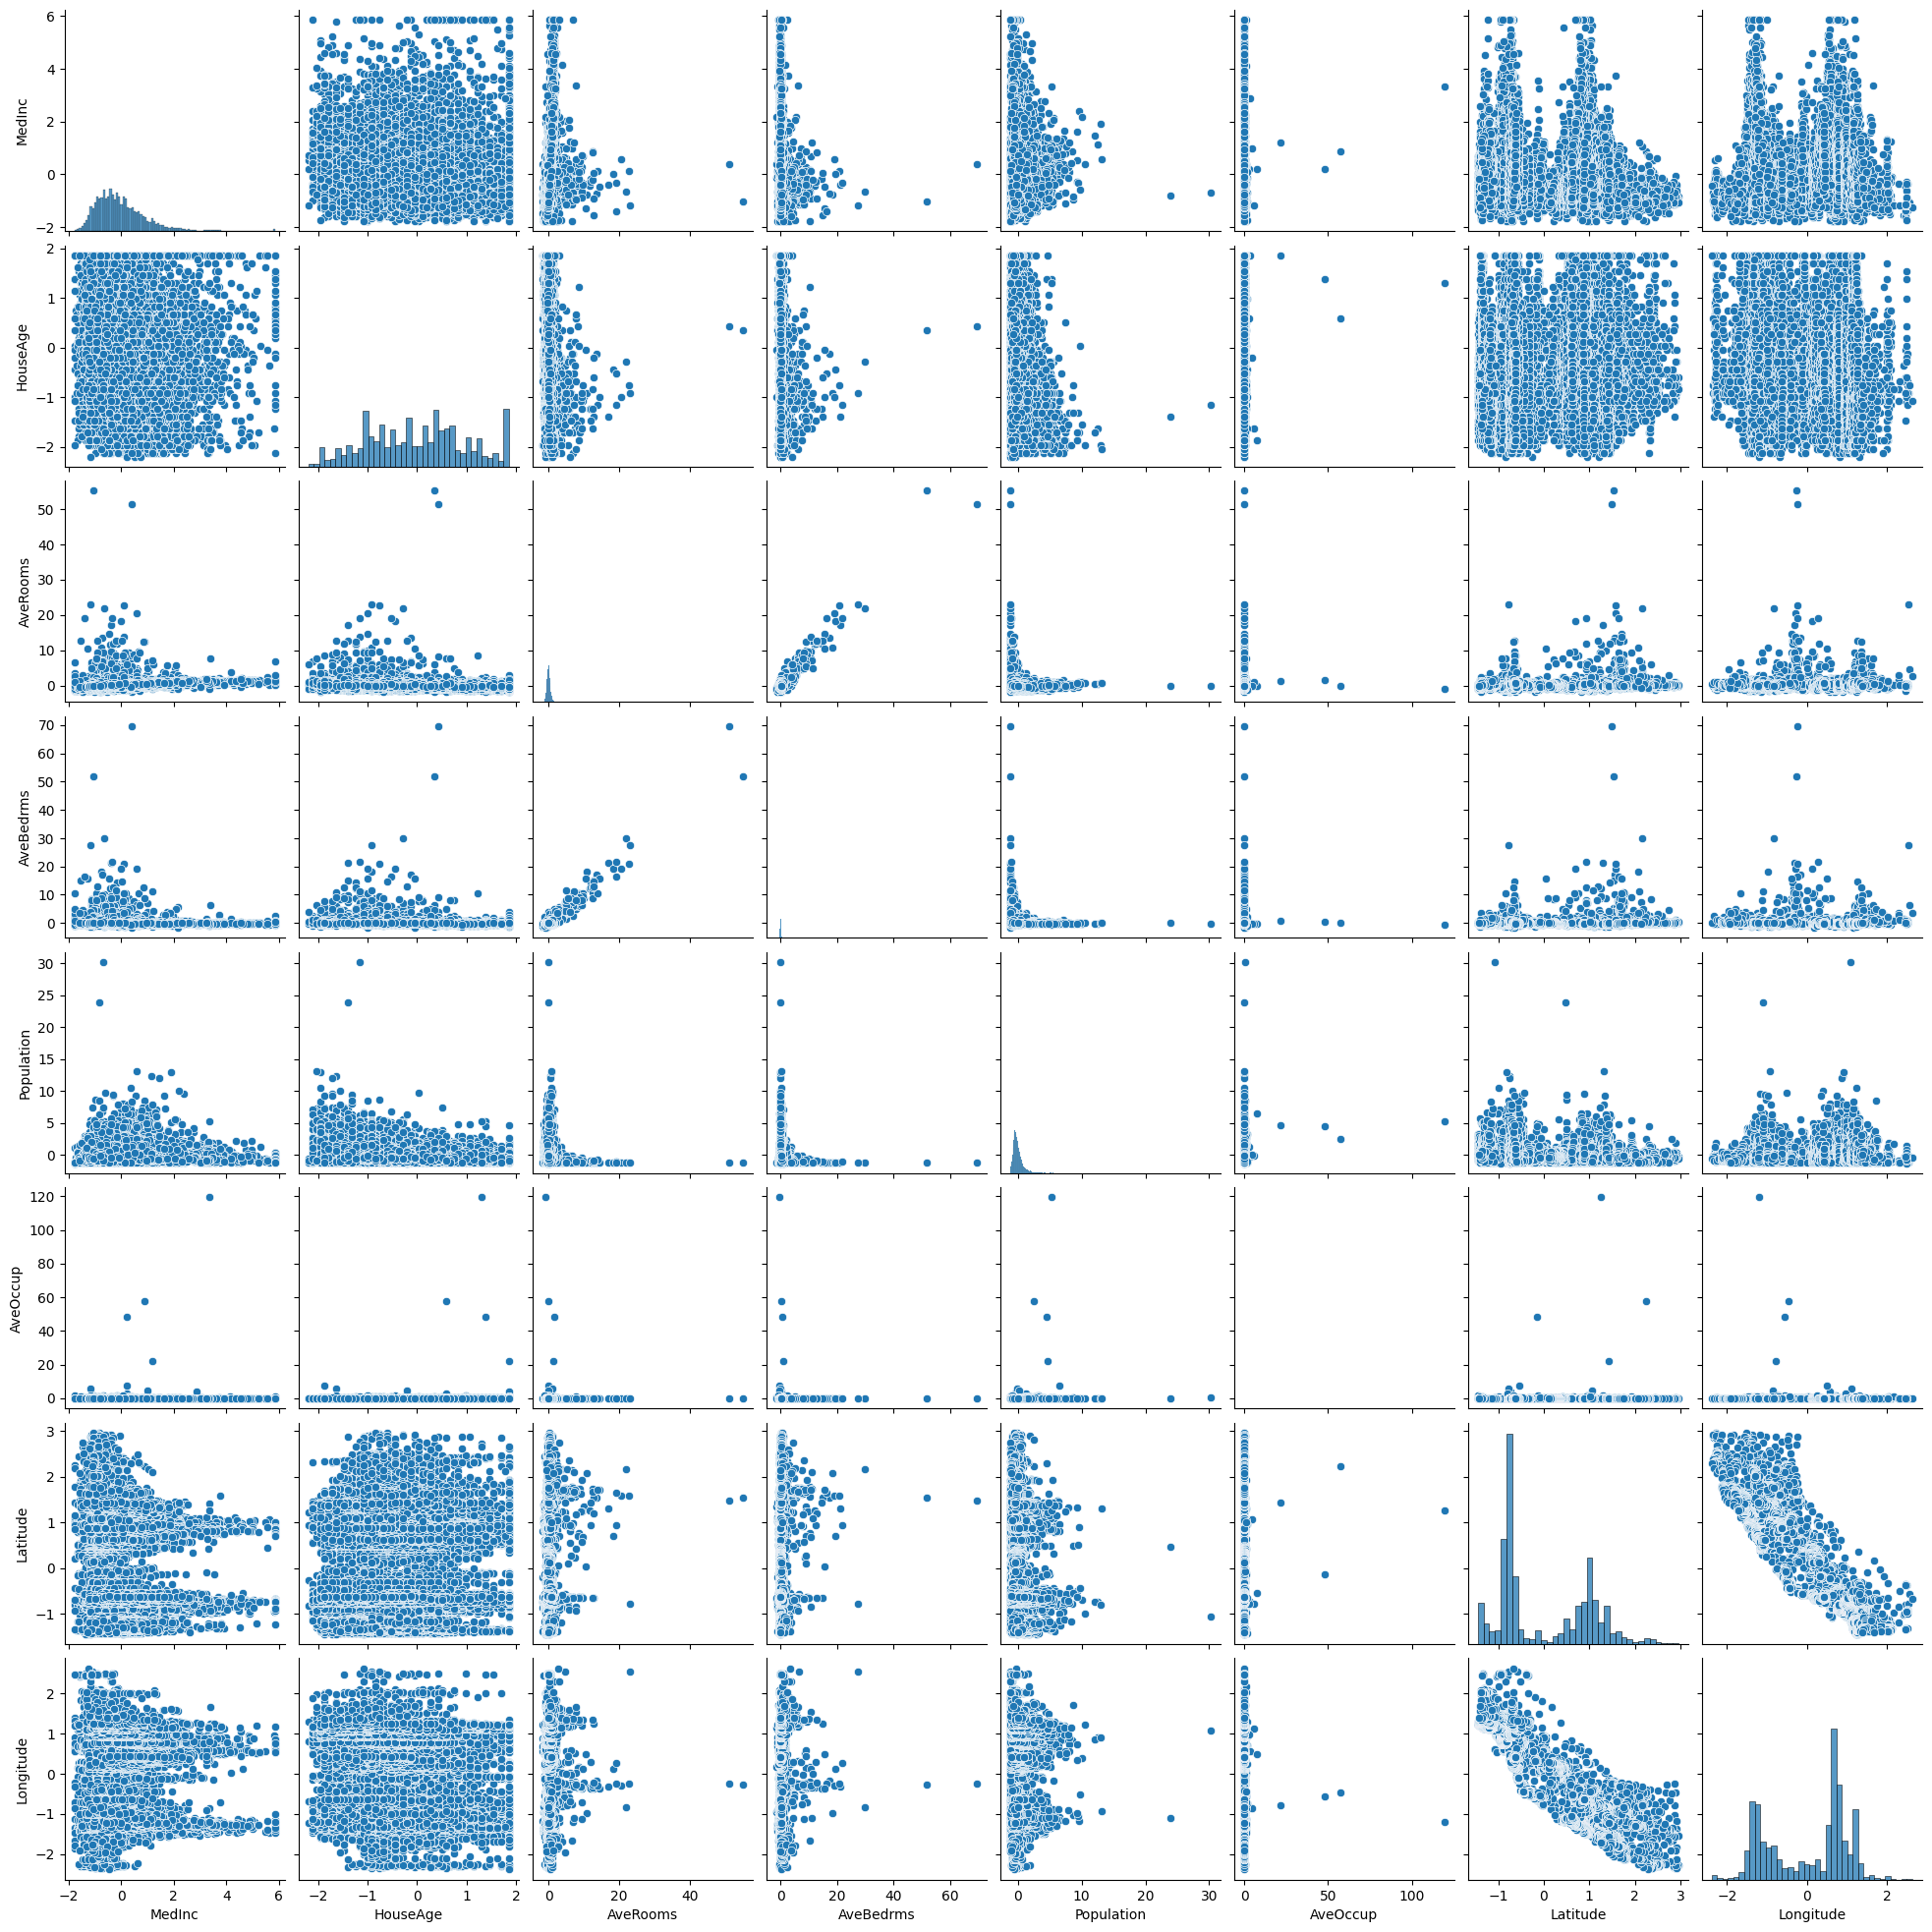

In [104]:
sns.pairplot(data_sc)

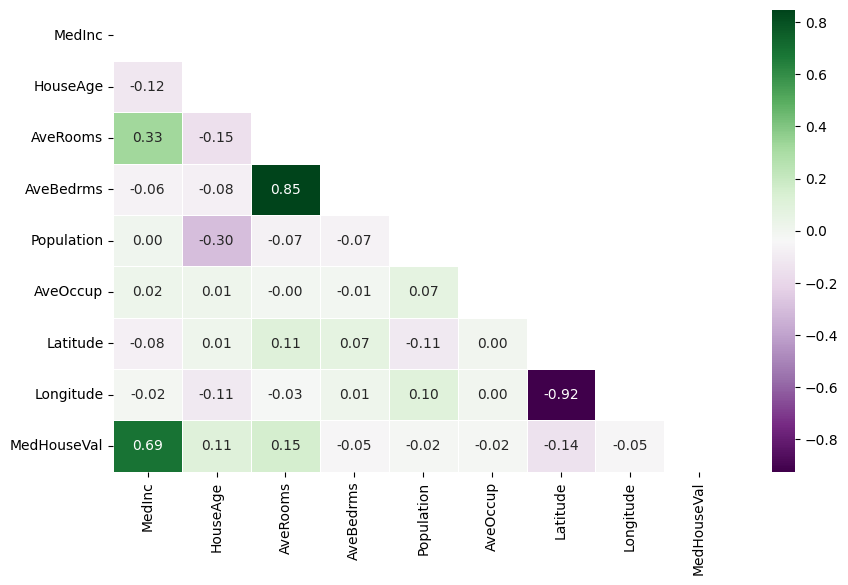

In [106]:
# Create the heatmap(with target)
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.heatmap(data.corr(), mask=mask, annot=True, cmap="PRGn", fmt=".2f", linewidths=0.5)

plt.show()

In [107]:
# Create the heatmap(without target)
# mask = np.triu(np.ones_like(data_sc.corr(), dtype=bool))

# plt.figure(figsize=(10, 6))  # Adjust the figure size
# sns.heatmap(data_sc.corr(), mask=mask, annot=True, cmap="PRGn", fmt=".2f", linewidths=0.5)

# plt.show()

From the heatmap, we can see that there is high Collinearity between AveBedrms and AveRooms, and a high negative collineraity 
between Latitude and Longitude. A few ways to fixing this issue is:
1. Removing one of the columns 
2. Combine both datasets (simple addition)
3. Principal Component Analysis (PCA)
4. Weighted Average Based on Target Correlation
5. Feature Engineering (Ratio or Difference)

In [108]:
#Removing one of the columns
#Since AveRooms has a higher correlation than AveBedrms, we will keep AveRooms in the dataset and remove aveBedrms
# data = data.drop('AveBedrms', axis=1)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [109]:
#Creating a dataset with all the different results for reducing dimensionality for rooms
# rooms = data_sc[['AveBedrms','AveRooms']]
# rooms

In [110]:
#Combining the datasets by simple addition
# rooms['RoomsComb'] = rooms['AveBedrms'] + rooms['AveRooms']
# rooms

In [111]:
#Using PCA dimensionality redution
# pca = PCA(n_components=1)
# data_pca = pca.fit_transform(data_sc[['AveBedrms', 'AveRooms']])

# rooms['RoomsPCA'] = data_pca
# rooms

In [112]:
#Weighted Average Based on Target Correlation
#Getting the correlation between AveRooms and Target, AveBedrms and Target
# temp_cor = data_sc[['AveRooms', 'AveBedrms']].copy()
# temp_cor['y'] = y
# # temp_cor
# correlations = temp_cor.corr()
# correlations_with_target = correlations['y']
# correlations_with_target

# #Using the correlations to make the weights (The weights are the magnitude of the correlation values)
# w1 = abs(correlations_with_target['AveRooms'])  
# w2 = abs(correlations_with_target['AveBedrms'])
# total_weight = w1 + w2

# #Calculating the weighted values
# rooms['WeightedRoomSize'] = (w1/total_weight) * rooms['AveRooms'] + \
#                          (w2/total_weight) * rooms['AveBedrms']
# rooms

In [113]:
# #Ratio of both dimensions
# rooms['RoomRatio'] = rooms['AveBedrms']/rooms['AveRooms']
# rooms

In [114]:
# #Checking correlation to target
# rooms['y'] = y
# mask = np.triu(np.ones_like(rooms.corr(), dtype=bool))

# plt.figure(figsize=(10, 6))  # Adjust the figure size
# sns.heatmap(rooms.corr(), mask=mask, annot=True, cmap="PuRd", fmt=".2f", linewidths=0.5)

# plt.show()

In [115]:
#Repeating the above process with the 2nd pair of highly colinear pair (Lagitude and Longitude)
#Creating a dataset with all the different results for reducing dimensionality for location
location = data_sc[['Latitude','Longitude']]

#Combining the datasets by simple addition
location['LocCom'] = location['Latitude'] + location['Longitude']

#Using PCA dimensionality redution
pca = PCA(n_components=1)
data_loc_pca = pca.fit_transform(data_sc[['Latitude', 'Longitude']])
location['LocPCA'] = data_loc_pca
location

C:\Users\Samar\AppData\Local\Temp\ipykernel_39852\1362831836.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location['LocCom'] = location['Latitude'] + location['Longitude']
C:\Users\Samar\AppData\Local\Temp\ipykernel_39852\1362831836.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location['LocPCA'] = data_loc_pca


,Latitude,Longitude,LocCom,LocPCA
0,1.052548,-1.327835,-0.275287,1.683185
1,1.043185,-1.322844,-0.279659,1.673035
2,1.038503,-1.332827,-0.294324,1.676783
3,1.038503,-1.337818,-0.299315,1.680312
4,1.038503,-1.337818,-0.299315,1.680312
...,...,...,...,...
20635,1.801647,-0.758826,1.042821,1.810528
20636,1.806329,-0.818722,0.987607,1.856191
20637,1.778237,-0.823713,0.954524,1.839857
20638,1.778237,-0.873626,0.904611,1.875151


In [116]:
#Weighted Average Based on Target Correlation
#Getting the correlation between Latitude and Target, Longitude and Target
temp1_cor = data_sc[['Latitude', 'Longitude']].copy()
temp1_cor['y'] = y
# temp_cor
correlations = temp1_cor.corr()
correlations_with_target = correlations['y']
correlations_with_target

#Using the correlations to make the weights (The weights are the magnitude of the correlation values)
w1 = abs(correlations_with_target['Latitude'])  
w2 = abs(correlations_with_target['Longitude'])
total_weight = w1 + w2

#Calculating the weighted values
location['WeightedLocation'] = (w1/total_weight) * location['Latitude'] + \
                         (w2/total_weight) * location['Longitude']
location

C:\Users\Samar\AppData\Local\Temp\ipykernel_39852\278264150.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location['WeightedLocation'] = (w1/total_weight) * location['Latitude'] + \


,Latitude,Longitude,LocCom,LocPCA,WeightedLocation
0,1.052548,-1.327835,-0.275287,1.683185,0.477048
1,1.043185,-1.322844,-0.279659,1.673035,0.471154
2,1.038503,-1.332827,-0.294324,1.676783,0.465191
3,1.038503,-1.337818,-0.299315,1.680312,0.463984
4,1.038503,-1.337818,-0.299315,1.680312,0.463984
...,...,...,...,...,...
20635,1.801647,-0.758826,1.042821,1.810528,1.182606
20636,1.806329,-0.818722,0.987607,1.856191,1.171675
20637,1.778237,-0.823713,0.954524,1.839857,1.149169
20638,1.778237,-0.873626,0.904611,1.875151,1.137101


In [117]:
#Ratio of both dimensions
location['LocRatio'] = location['Latitude']/location['Longitude']
location

C:\Users\Samar\AppData\Local\Temp\ipykernel_39852\749372207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location['LocRatio'] = location['Latitude']/location['Longitude']


,Latitude,Longitude,LocCom,LocPCA,WeightedLocation,LocRatio
0,1.052548,-1.327835,-0.275287,1.683185,0.477048,-0.792680
1,1.043185,-1.322844,-0.279659,1.673035,0.471154,-0.788592
2,1.038503,-1.332827,-0.294324,1.676783,0.465191,-0.779173
3,1.038503,-1.337818,-0.299315,1.680312,0.463984,-0.776266
4,1.038503,-1.337818,-0.299315,1.680312,0.463984,-0.776266
...,...,...,...,...,...,...
20635,1.801647,-0.758826,1.042821,1.810528,1.182606,-2.374255
20636,1.806329,-0.818722,0.987607,1.856191,1.171675,-2.206279
20637,1.778237,-0.823713,0.954524,1.839857,1.149169,-2.158807
20638,1.778237,-0.873626,0.904611,1.875151,1.137101,-2.035467


In [118]:
#Using a special kind of combination: Haversine formula
def single_pt_haversine(lat, lon, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lon = map(radians, [lat, lon])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lon/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d

location['Haversine'] = [single_pt_haversine(x, y) for x, y in zip(data['Latitude'], data['Longitude'])]
location

C:\Users\Samar\AppData\Local\Temp\ipykernel_39852\3731729946.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location['Haversine'] = [single_pt_haversine(x, y) for x, y in zip(data['Latitude'], data['Longitude'])]


,Latitude,Longitude,LocCom,LocPCA,WeightedLocation,LocRatio,Haversine
0,1.052548,-1.327835,-0.275287,1.683185,0.477048,-0.792680,12775.680846
1,1.043185,-1.322844,-0.279659,1.673035,0.471154,-0.788592,12775.664766
2,1.038503,-1.332827,-0.294324,1.676783,0.465191,-0.779173,12777.703613
3,1.038503,-1.337818,-0.299315,1.680312,0.463984,-0.776266,12778.522430
4,1.038503,-1.337818,-0.299315,1.680312,0.463984,-0.776266,12778.522430
...,...,...,...,...,...,...,...
20635,1.801647,-0.758826,1.042821,1.810528,1.182606,-2.374255,12619.374099
20636,1.806329,-0.818722,0.987607,1.856191,1.171675,-2.206279,12628.587940
20637,1.778237,-0.823713,0.954524,1.839857,1.149169,-2.158807,12631.786838
20638,1.778237,-0.873626,0.904611,1.875151,1.137101,-2.035467,12639.800120


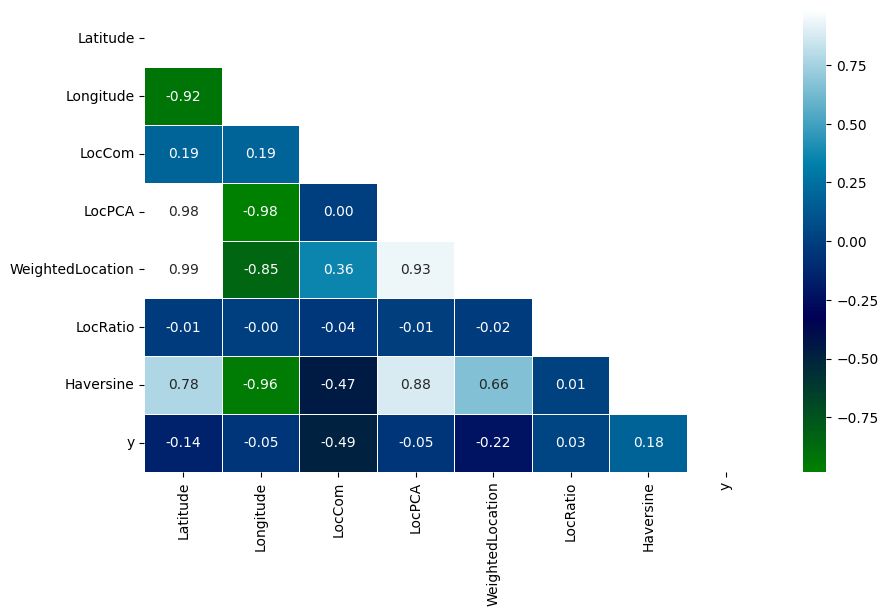

In [119]:
#Checking correlation to target
location['y'] = y
mask = np.triu(np.ones_like(location.corr(), dtype=bool))

plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.heatmap(location.corr(), mask=mask, annot=True, cmap="ocean", fmt=".2f", linewidths=0.5)

plt.show()

In [150]:
#Due to there being no good correlation between any of the features of the location dataset and the target, the latitude and longitude
# features will be removed from the orginal dataset, along with the AveBedrms since it has a poorer correlation with the target as 
# compared to AveRooms

columns_to_drop = ['AveBedrms', 'Latitude', 'Longitude']
try:
    data_sc = data_sc.drop(columns=columns_to_drop)
except:
    pass
data_sc


,MedInc,HouseAge,AveRooms,Population,AveOccup
0,2.344766,0.982143,0.628559,-0.974429,-0.049597
1,2.332238,-0.607019,0.327041,0.861439,-0.092512
2,1.782699,1.856182,1.155620,-0.820777,-0.025843
3,0.932968,1.856182,0.156966,-0.766028,-0.050329
4,-0.012881,1.856182,0.344711,-0.759847,-0.085616
...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,-0.512592,-0.049110
20636,-0.691593,-0.845393,0.276881,-0.944405,0.005021
20637,-1.142593,-0.924851,-0.090318,-0.369537,-0.071735
20638,-1.054583,-0.845393,-0.040211,-0.604429,-0.091225


In [151]:
# Splitting the dataset into training and (testing/validation): 60% train, 40% remaining (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(data_sc, y, test_size=0.4, random_state=42)



In [152]:
# Splitting the testing and validation dataset: The remaining becomes 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [153]:
X_train.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup
9012,1.054245,0.505394,0.154657,0.084352,-0.071386
2769,-1.264292,-1.639974,1.847531,-1.203139,-0.042910
1953,-0.900302,-0.050812,-0.250929,0.514399,-0.076203
16897,0.457806,1.141059,0.172240,-0.404859,-0.078117
17866,-0.320549,-1.481058,-0.606220,0.535592,-0.100398


In [154]:
X_test.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup
19803,-0.538733,-0.130270,2.785240,-0.909083,-0.041466
13506,-1.331195,0.346478,-0.407095,-0.518773,0.086744
15565,0.716731,-0.527561,0.515506,-0.288296,-0.003345
898,-0.658431,-0.845393,-0.556199,-0.153189,-0.089944
16296,-0.773602,0.664310,-0.378486,-0.268869,0.024625


In [155]:
X_val.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup
5595,-0.787288,0.267020,-0.877989,0.329841,0.172496
8046,-0.215905,1.299975,-0.344722,-0.560277,-0.068311
3798,-0.400085,-1.401600,-0.708211,0.206213,-0.093204
6659,-0.359606,-1.560516,-0.662941,-0.153189,-0.078061
9567,-0.867719,0.425936,-0.199641,-0.367771,-0.043316


In [165]:
#Conversion of the dataset into numpy arrays
X_train_np = X_train.values
X_val_np = X_val.values
X_test_np = X_test.values
y_train_np = y_train.values
y_val_np = y_val.values
y_test_np = y_test.values

In [166]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_np, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_np, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val_np, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32).view(-1, 1)

# Confirming shapes of the tensors
print("Shape of Training data:", X_train_tensor.shape, y_train_tensor.shape)
print("Shape of Validation data:", X_val_tensor.shape, y_val_tensor.shape)
print("Shape of Test data:", X_test_tensor.shape, y_test_tensor.shape)

Shape of Training data: torch.Size([12384, 5]) torch.Size([12384, 1])
Shape of Validation data: torch.Size([4128, 5]) torch.Size([4128, 1])
Shape of Test data: torch.Size([4128, 5]) torch.Size([4128, 1])


In [167]:
#Model definition
class LinearRegression(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()
        self.lay1 = nn.Linear(input_dim, 64) 
        self.lay2 = nn.Linear(64, 32)
        self.lay3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = torch.relu(self.lay1(x))
        x = torch.relu(self.lay2(x))
        return self.lay3(x)


In [168]:
# Initializing the model
input_dim = X_train_tensor.shape[1]  
model = LinearRegression(input_dim)

In [169]:
# Loss and optimizer
criterion = nn.MSELoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

In [170]:
# Training the Model (And checking the validation)
num_epochs = 2000
train_loss = []
val_loss = []
for epoch in range(num_epochs):
    model.train()  # Training mode
    # Forward pass (training)
    train_outputs = model(X_train_tensor)
    tr_loss = criterion(train_outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    tr_loss.backward()
    optimizer.step()
    
    # Validation (no gradients)
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        va_loss = criterion(val_outputs, y_val_tensor)
    
    # Store losses
    train_loss.append(tr_loss.item())
    val_loss.append(va_loss.item())
    
    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {tr_loss.item():.4f}, Val Loss: {va_loss.item():.4f}')

Epoch [100/2000], Train Loss: 0.4542, Val Loss: 0.4776
Epoch [200/2000], Train Loss: 0.4175, Val Loss: 0.4419
Epoch [300/2000], Train Loss: 0.4030, Val Loss: 0.4284
Epoch [400/2000], Train Loss: 0.3968, Val Loss: 0.4254
Epoch [500/2000], Train Loss: 0.3918, Val Loss: 0.4235
Epoch [600/2000], Train Loss: 0.3875, Val Loss: 0.4219
Epoch [700/2000], Train Loss: 0.3836, Val Loss: 0.4215
Epoch [800/2000], Train Loss: 0.3812, Val Loss: 0.4220
Epoch [900/2000], Train Loss: 0.3799, Val Loss: 0.4239
Epoch [1000/2000], Train Loss: 0.3765, Val Loss: 0.4231
Epoch [1100/2000], Train Loss: 0.3743, Val Loss: 0.4242
Epoch [1200/2000], Train Loss: 0.3715, Val Loss: 0.4245
Epoch [1300/2000], Train Loss: 0.3696, Val Loss: 0.4256
Epoch [1400/2000], Train Loss: 0.3705, Val Loss: 0.4305
Epoch [1500/2000], Train Loss: 0.3672, Val Loss: 0.4285
Epoch [1600/2000], Train Loss: 0.3649, Val Loss: 0.4293
Epoch [1700/2000], Train Loss: 0.3654, Val Loss: 0.4300
Epoch [1800/2000], Train Loss: 0.3660, Val Loss: 0.4311
E

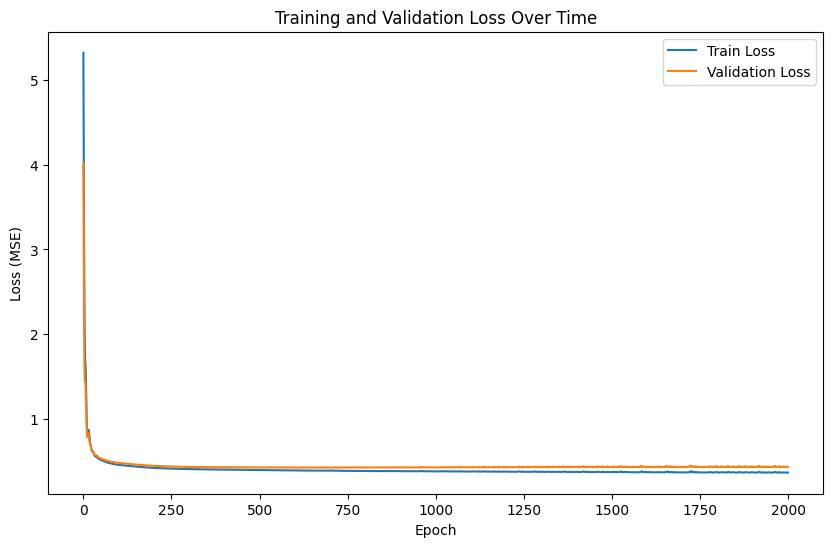

In [171]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_loss, label='Train Loss')
plt.plot(range(num_epochs), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()

In [172]:
# Final Evaluation on Test Set
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor).numpy()
    y_pred_val = model(X_val_tensor).numpy()
    y_pred_test = model(X_test_tensor).numpy()
    y_train_np = y_train_tensor.numpy()
    y_val_np = y_val_tensor.numpy()
    y_test_np = y_test_tensor.numpy()

    # Calculate R² scores
    train_r2 = r2_score(y_train_np, y_pred_train)
    val_r2 = r2_score(y_val_np, y_pred_val)
    test_r2 = r2_score(y_test_np, y_pred_test)

    print(f'Train R² Score: {train_r2:.4f}')
    print(f'Validation R² Score: {val_r2:.4f}')
    print(f'Test R² Score: {test_r2:.4f}')

Train R² Score: 0.7256
Validation R² Score: 0.6706
Test R² Score: 0.6819


In [173]:
for name, param in model.named_parameters():
    print(f"Parameter: {name}")
    print(f"Shape: {param.shape}")
    print(f"Mean: {param.data.mean().item():.4f}")
    print(f"Std: {param.data.std().item():.4f}")
    print(f"Min: {param.data.min().item():.4f}")
    print(f"Max: {param.data.max().item():.4f}")
    print()

Parameter: lay1.weight
Shape: torch.Size([64, 5])
Mean: -0.1968
Std: 0.7268
Min: -4.9936
Max: 0.9838

Parameter: lay1.bias
Shape: torch.Size([64])
Mean: -0.0882
Std: 0.4585
Min: -1.5351
Max: 0.5535

Parameter: lay2.weight
Shape: torch.Size([32, 64])
Mean: -0.0332
Std: 0.2306
Min: -1.5595
Max: 2.8921

Parameter: lay2.bias
Shape: torch.Size([32])
Mean: 0.0113
Std: 0.0968
Min: -0.1860
Max: 0.1735

Parameter: lay3.weight
Shape: torch.Size([1, 32])
Mean: 0.1747
Std: 0.3913
Min: -0.7881
Max: 1.5887

Parameter: lay3.bias
Shape: torch.Size([1])
Mean: -0.0013
Std: nan
Min: -0.0013
Max: -0.0013



C:\Users\Samar\AppData\Local\Temp\ipykernel_39852\2051590884.py:5: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\ReduceOps.cpp:1831.)
  print(f"Std: {param.data.std().item():.4f}")
